## Pandas Tutorial

### Series

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Pandas uses something called a dataframe. It is a 
# 2D data structure that can hold multiple data types.
# Columns have labels.

# Series are built on top of NumPy arrays. 
# Create a series by first creating a list
list_1 = ['a', 'b', 'c', 'd']
labels = [1,2,3,4]

# I can define that I want the series indexes to be the provided labels
ser_1 = pd.Series(data = list_1, index = labels)
print(ser_1)

1    a
2    b
3    c
4    d
dtype: object


In [3]:
arr_1 = np.array([1,2,3,4])
ser_2 = pd.Series(arr_1)

dict_1 = {'f_name': "Derek", "l_name": "Banas", "age": 44}
ser_3 = pd.Series(dict_1)
print(ser_3['f_name'])

Derek


In [4]:
# You can get the datatype
print(ser_2.dtype)

int32


In [5]:
# You can perform math operations on series
print(ser_2 + ser_2)
ser_2 - ser_2
ser_2 * ser_2
ser_2 / ser_2

0    2
1    4
2    6
3    8
dtype: int32


0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64

In [6]:
# You can assign names to series
ser_4 = pd.Series({8: 9, 9: 10}, name='rand_nums')
ser_4.name

'rand_nums'

### DataFrames

#### Creating DataFrames

In [7]:
from numpy import random

# Create random matrix 2x3 with values between 10 and 50
arr_2 = np.random.randint(10, 50, size=(2, 3))
print(arr_2)

# Create DF with data, row labels & column labels
df_1 = pd.DataFrame(arr_2, ['A', 'B'], ['C', 'D', 'E'])
print(df_1)

[[25 34 32]
 [42 31 48]]
    C   D   E
A  25  34  32
B  42  31  48


In [8]:
# Create a DF from multiple series in a dict
# If series are of different lengthes extra spaces are NaN
dict_3 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dict_3)
print(df_2)

# from_dict accepts a column labels and lists
print(pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])])))


# You can assign the keys as row labels and column labels separate
# with orient='index'
print(pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]),
                      orient='index', columns=['one','two','three']))


# Get number of rows and columns as tuple
print(df_1.shape)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
   A  B
0  1  4
1  2  5
2  3  6
   one  two  three
A    1    2      3
B    4    5      6
(2, 3)


### Editing and Retreiving Data

In [9]:
# Grab a column
print(df_1['C'])
# Get multiple columns
df_1[['C', 'E']]

# Grabb a row as a series
print(df_1.loc['A'])
# Grab row by index position
print(df_1.iloc[1])

# Grab multiple cells by defining rows wanted & the
# columns from those rows
print(df_1.loc[['A', 'B'], ['D', 'E']])

A    25
B    42
Name: C, dtype: int32
C    25
D    34
E    32
Name: A, dtype: int32
C    42
D    31
E    48
Name: B, dtype: int32
    D   E
A  34  32
B  31  48


In [10]:
# Make new column
df_1['Total'] = df_1['C'] + df_1['D'] + df_1['E']
df_1

# You can perform multiple calculations
df_2['mult'] = df_2['one'] * df_2['two']
df_2

# Make a new row by appending
dict_2 = {'C': 44, 'D': 45, 'E': 46}
new_row = pd.Series(dict_2, name='F')
df_1 = df_1.append(new_row)

# Delete column and set inplace to True which is required
# because Pandas tries to help you not delete data
# by accident
# df_1.drop('Total', axis=1, inplace=True)
# df_1
# # Delete a row
# df_1.drop('B', axis=0, inplace=True)
# df_1

In [11]:
# Create a new column and make it the index
# df_1['Sex'] = ['Men', 'Women']
# df_1.set_index('Sex', inplace=True)
# print(df_1)

In [12]:
# You can reset index values to numbers
#df_1.reset_index(inplace=True)
df_1

# Assign can be used to create a column while leaving the
# original DF untouched
df_2.assign(div=df_2['one'] / df_2['two'])

# You can pass in a function as well
df_2.assign(div=lambda x: (x['one'] / x['two']))


,one,two,mult,div
a,1.0,1.0,1.0,1.0
b,2.0,2.0,4.0,1.0
c,3.0,3.0,9.0,1.0
d,NaN,4.0,NaN,NaN


In [13]:
# Combine DataFrames while keeping df_3 data unless
# there is a NaN value
df_3 = pd.DataFrame({'A': [1., np.nan, 3., np.nan]})
df_4 = pd.DataFrame({'A': [8., 9., 2., 4.]})
df_3.combine_first(df_4)

,A
0,1.0
1,9.0
2,3.0
3,4.0


### Conditional Selection

In [14]:
arr_2 = np.random.randint(10, 50, size=(2, 3))
df_1 = pd.DataFrame(arr_2, ['A', 'B'], ['C', 'D', 'E'])
print(df_1)

# You can use conditional operators to retrieve a table based on the condition
print("Greater than 40\n", df_1 > 40.0)

# You can use comparison operater functions as well like
# gt, lt, ge, le, eq, ne
print("Greater than 45\n", df_1.gt(45.0))

# You can place conditions in brackets as well
bool_1 = df_1 >= 45.0
df_1[bool_1]

# Get bools for a column
df_1['E'] > 40

# Return a row if cell value in column matches a condition
df_1[df_1['E']>30]


    C   D   E
A  14  27  20
B  39  35  37
Greater than 40
        C      D      E
A  False  False  False
B  False  False  False
Greater than 45
        C      D      E
A  False  False  False
B  False  False  False


,C,D,E
B,39,35,37


In [15]:
# You can focus on a column based on resulting dataframe
df_2 = df_1[df_1['E']>30]
df_2['C']


B    39
Name: C, dtype: int32

In [16]:
# You can stack these commands
print(df_1[df_1['E']>20]['C'])
print()


B    39
Name: C, dtype: int32



In [17]:
# You can use multiple conditions
arr_3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df_2 = pd.DataFrame(arr_3, ['A', 'B', 'C'], ['X', 'Y', 'Z'])
print(df_2, "\n")
# You can use or | to combine conditions as well
df_2[(df_2['X']>3) & (df_2['X']<7)]

df_2[(df_2['X']>3) | (df_2['X']<7)]


   X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9 



,X,Y,Z
A,1,2,3
B,4,5,6
C,7,8,9


### File Input/Output

In [18]:
# import pymysql

# Read a CSV file
# Type pd.read_ [TAB] to see the file types you can read
cs_df = pd.read_csv('ComputerSales.csv')


### Basics & Math

In [19]:
# Display 1st 5 rows
cs_df.head()
# Display last 5 rows
cs_df.tail()
# Get 1st 2
cs_df[:2]
# Get 1st through 5 with a 2 step
cs_df[:5:2]

# Get indexes
cs_df.index.array
# Get NumPy array
cs_df.to_numpy()
# Get array from series
ser_1.array

dict_3 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dict_3)

# You can replace NaN values with 0 or anything else
print(df_2.fillna(0))
# Get values in row 2
row = df_2.iloc[1]
# Add items in row 2 to all rows including row 2
# You can do the same with sub, mul, and div
df_2.add(row, axis='columns')

# Get column 2
col = df_2['two']
# Subtract from other columns
df_2.sub(col, axis=0)

# Check if empty
df_2.empty

# Transform executes a function on a dataframe
df_5 = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df_5.transform(lambda x: x+1)
df_5.transform(lambda x: x**2)
df_5.transform(lambda x: np.sqrt(x))
# You can transform using multiple functions
df_5.transform([lambda x: x**2, lambda x: x**3])
# Passing a dictionary allows you to perform different calculations
# on different columns
df_5.transform({'A': lambda x: x**2, 'B': lambda x: x**3})

# map performs a function on a series
df_5['A'].map(lambda x: x**2)

# applymap does the same on a dataframe
df_5.applymap(lambda x: x**2)

# Get unique values in column 2 of DF
df_2['two'].unique()

# Get number of uniques
df_2['two'].nunique()

# Get the number of times each value showed in column 2
df_2['two'].value_counts()

# Get column names
df_2.columns

# Get index info
df_2.index

# Return a DF that lists null values as True
df_2.isnull()

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0


,one,two
a,False,False
b,False,False
c,False,False
d,True,False


### Group Data

In [20]:
# Groupby allows you to group rows based on a columnand perform a function
# that combines those values (Aggregate Function)
dict_5 = {'Store': [1,2,1,2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 
         'Sales': [26, 12, 18, 22]}

df_11 = pd.DataFrame(dict_5)

# Gruop data by the store number
by_store = df_11.groupby("Store")
#Get the mean sales by store
print(by_store.mean())

# Get sales total just for store 1
print(by_store.sum().loc[1])

# You can use multiple functions of
print(by_store.describe())

       Sales
Store       
1       22.0
2       17.0
Sales    44
Name: 1, dtype: int64
      Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0


### Concatenate Merge and Join Data

In [21]:
# You can concatenate DFs in the order DFs are provided
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12]},
                    index=[4,5,6])
pd.concat([df_12, df_13])

,A,B
1,1,4
2,2,5
3,3,6
4,7,10
5,8,11
6,9,12


In [22]:
# Merge 2 DFs using their shared key column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6],
                     'key': [1,2,3]})
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12],
                     'key': [1,2,3]})

# inner merges at the intersection of keys
pd.merge(df_12, df_13, how='inner', on='key')

# how='left' or 'right' : Use keys from left or right frame
# how='outer' : Use union of keys
print(pd.merge(df_12, df_13, how='right', on='key'))

   A_x  B_x  key  A_y  B_y
0    1    4    1    7   10
1    2    5    2    8   11
2    3    6    3    9   12


In [23]:
# You can join DFs with different indexes and instead of using 
# keys use a column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'C': [7,8,9],
                     'D': [10,11,12]},
                    index=[1,4,5])
df_12.join(df_13, how='outer')

,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


### Statistics

In [24]:
# Get ice cream sales data
ics_df = pd.read_csv('icecreamsales.csv')
ics_df


,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440
5,79,496
6,83,536
7,81,556
8,75,496
9,64,412


In [25]:
# Get total count of both columns
ics_df.count()

# skipna skips null / NaN values
print(ics_df.sum(skipna=True))

# Get mean for named column
ics_df["Sales"].mean()
ics_df["Sales"].median()
ics_df["Sales"].mode()
ics_df["Sales"].min()
ics_df["Sales"].max()
ics_df["Sales"].prod() # Product of values
ics_df["Sales"].std() # Standard deviation
ics_df["Sales"].var() # Variance
ics_df["Sales"].sem() # Standard error

Temperature     734
Sales          4800
dtype: int64


30.498882244794125

In [26]:
# Negative : Left long tail, Positive : Right long tail
ics_df["Sales"].skew()

0.036552031682046925

In [27]:
# Kurtosis : < 3 less outliers, 3 Normal Distribution,
# > 3 more outliers
ics_df["Sales"].kurt()
ics_df["Sales"].quantile(.5)
ics_df["Sales"].cumsum()
ics_df["Sales"].cumprod()
ics_df["Sales"].cummax()
ics_df["Sales"].cummin()

# Multiple stats at once
ics_df.describe()

,Temperature,Sales
count,12.000000,12.000000
mean,61.166667,400.000000
std,17.055169,105.651227
min,37.000000,228.000000
25%,46.750000,323.000000
50%,62.500000,394.000000
75%,76.000000,496.000000
max,83.000000,556.000000


In [28]:
ser_dice = pd.Series(data=[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 
                           6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
                          8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12])
# Count for each value in series
ser_dice.value_counts()

7     6
6     5
8     5
5     4
9     4
4     3
10    3
3     2
11    2
2     1
12    1
dtype: int64

In [29]:
# You can perform calculations on multiple columns using
# aggregate
print(df_2)
df_2.agg(np.mean)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


one    2.0
two    2.5
dtype: float64

In [30]:
# You can do this with multiple functions
df_2.agg(['mean', 'std'])

,one,two
mean,2.0,2.500000
std,1.0,1.290994


### Iteration

In [31]:
# Iterating over series
ser_7 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
for col in ser_7:
    print(col)

print()

0
1
2
3
4



In [32]:
# Iterating over DFs
arr_4 = np.random.randint(10, 50, size=(2, 3))
df_8 = pd.DataFrame(arr_4, ['B', 'C'], ['C', 'D', 'E'])
print(df_8)
print()
# items allows you to iterate through key value pairs to make
# calculations 1 column at a time
for label, ser in df_8.items():
    print(label)
    print(ser)   
print()

    C   D   E
B  41  29  25
C  45  20  36

C
B    41
C    45
Name: C, dtype: int32
D
B    29
C    20
Name: D, dtype: int32
E
B    25
C    36
Name: E, dtype: int32



In [33]:
# You can also iterate through rows
for index, row in df_8.iterrows():
    print(f"{index}\n{row}")
print()

B
C    41
D    29
E    25
Name: B, dtype: int32
C
C    45
D    20
E    36
Name: C, dtype: int32



In [34]:
# Get a tuple that contains row data
for row in df_8.itertuples():
    print(row)

Pandas(Index='B', C=41, D=29, E=25)
Pandas(Index='C', C=45, D=20, E=36)


In [35]:
df_8

# Sorting by index will return the same results if indexes
# are in order, to reverse indexes mark ascending as False
df_8.sort_index(ascending=False)

# Sort by value for column D (Use the same function for series)
df_8.sort_values(by='D')

,C,D,E
C,45,20,36
B,41,29,25


### Passing Data to Functions

In [36]:
import sys

# You can pass DataFrames and Series into functions
def get_profit_total(df):
    prof_ser = df['Profit']
    print(f"Total Profit : {prof_ser.sum()}")

get_profit_total(cs_df)

Total Profit : 5459.010000000001


In [37]:
# Receives a DataFrame, splits the contact into new columns
# being first and last name
def split_name(df):
    def get_names(full_name):
        # Split contact at space
        f_name, l_name = full_name.split()
        # Create a series with first & last names in columns
        # with those labels
        return pd.Series(
        (f_name, l_name),
        index=['First Name', 'Last Name']
        )
    # apply() executes the function on all names in Contact column
    names = df['Contact'].apply(get_names)
    df[names.columns] = names
    return df

# Run function and display top 5 results
split_name(cs_df).head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk


In [38]:
def create_age_groups(df):
    # Must have 1 more bins than labels
    bins = [0, 30, 50, sys.maxsize]
    # Group labels
    labels = ['<30', '30-50', '>50']
    age_group = pd.cut(df['Age'], bins = bins, labels = labels)
    df['Age_Group'] = age_group
    return df

create_age_groups(cs_df)

# You can use a pipe to pass a dataframe to multiple functions
cs_df.pipe(split_name).pipe(create_age_groups).head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age_Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50


### Aligning, Reindexing and Renaming Labels

In [39]:
ser_6 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
sl_1 = ser_6[:4]
sl_2 = ser_6[1:]
print(sl_1)
print(sl_2)
print()
# Align both series by the union of their indexes
sl_1.align(sl_2)

# Align by calling series
sl_1.align(sl_2, join='left')
print()
# Use passed series indexes
sl_1.align(sl_2, join='right')

# Get where indexes intersect
sl_1.align(sl_2, join='inner')

a    0
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
e    4
dtype: int64




(b    1
 c    2
 d    3
 dtype: int64,
 b    1
 c    2
 d    3
 dtype: int64)

In [40]:
# You can use align with DFs as well
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_6 = pd.DataFrame(arr_3, ['A', 'B'], ['C', 'D', 'E'])
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_7 = pd.DataFrame(arr_3, ['B', 'C'], ['C', 'D', 'E'])
df_6
df_6.align(df_7)

(      C     D     E
 A  10.0  24.0  13.0
 B  44.0  10.0  45.0
 C   NaN   NaN   NaN,
       C     D     E
 A   NaN   NaN   NaN
 B  18.0  34.0  45.0
 C  49.0  49.0  26.0)

In [41]:
# reindex allows you to align data by index
ser_6.reindex(['c','b','a'])

# Do the same with DFs
df_6.reindex(['B','A'])

# Drop is very similar to reindex except it receives labels
# you don't want to include
df_6.drop(['A'], axis=0)
df_6.drop(['D'], axis=1)

# You can rename labels
df_6.rename(columns={'C': 'Men', 'D': 'Women', 'E': 'Pets'},
           index={'A': 1, 'B': 2})

,Men,Women,Pets
1,10,24,13
2,44,10,45


### MultiIndex

In [56]:
days = ['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2']
meals = [1,2,3,1,2,3]
# zip pairs the days and meals arrays 
# Then we create a list of those paired tuples
hier_index = list(zip(days, meals))
print(hier_index)
print()
# Converts list of tuples into each row and column
hier_index = pd.MultiIndex.from_tuples(hier_index)
arr_5 = np.random.randint(500, 700, size = (6,2))
df_9 = pd.DataFrame(arr_5, hier_index, ['M','F'])
print(df_9)
print()
# Grab the day 1 DF
df_9.loc['Day 1']

# Grab 1st row as a series
df_9.loc['Day 1'].loc[1]

# Grab calories eaten by the female on day 2 for the 2nd meal
df_9.loc['Day 2'].loc[2]['F']

# We can assign names to the Day and Meals Column
df_9.index.names = ['Day', 'Meal']
df_9

# Get a cross section
# This gets me the Day 2 DF
df_9.xs('Day 2')

# Get calories for the 1st meal for both days by saying what
# meal index you want and the Meal column name
df_9.xs(1, level='Meal')

# Create a MultiIndex out of a DF using a pivot table
dict_6 = {'A':['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2'],
         'B': [1,2,3,1,2,3],
         'C': ['M', 'F', 'M', 'F', 'M', 'F'],
         'D': [1,2,3,4,5,6]}

# Designate the D column is the data
# Make A & B a multilevel index
# Define column names come from column C
# You will have NaNs where data was missing
df_14 = pd.DataFrame(dict_6)
df_14.pivot_table(values = "D", index = ['A', 'B'], columns = ['C'])

[('Day 1', 1), ('Day 1', 2), ('Day 1', 3), ('Day 2', 1), ('Day 2', 2), ('Day 2', 3)]

           M    F
Day 1 1  679  699
      2  515  621
      3  629  531
Day 2 1  624  566
      2  621  577
      3  635  664



C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  NaN
      3  NaN  3.0
Day 2 1  4.0  NaN
      2  NaN  5.0
      3  6.0  NaN

### Handling Missing Data

In [63]:
dict_4 = {'A': [1,2,np.nan], 'B': [4, np.nan, np.nan], 'C': [7.,8.,9.]}
df_10 = pd.DataFrame(dict_4)
print(df_10)

# Drop all columns with any missing data
df_10.dropna(axis = 1)

# Drop row unless it has at least 2 non-NaN values
df_10.dropna(thresh=2)

# Fill NaN values with 0
df_10.fillna(value=0.0)

# Fill A column with the mean of column
df_10['A'].fillna(value=df_10['A'].mean())

# Fill with previous value
df_10.fillna(method='ffill')

# Fill with next value (Only works if there is a next value)
df_10.fillna(method='bfill')

     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  NaN  NaN  9.0


,A,B,C
0,1.0,4.0,7.0
1,2.0,NaN,8.0
2,NaN,NaN,9.0


### Experimenting with Data

In [73]:
print(cs_df.columns)
cs_df['Profit'].mean()
# Get the product with the highest profit
cs_df[['Product ID', 'Profit']].max(axis=0)

# Number of people who purchased from WV
cs_df[cs_df['State']=='WV']['State'].count() # 4 sales from WV

len(cs_df[cs_df['Year']==2019].index) # 14 product sales in 2019

cs_df['Product ID'].value_counts()

cs_df[cs_df['Product ID']=='M01-F0024']['Contact'] # Get list of customers that bought a specific product

# How many made a website purchase for a profit over $200
cs_df[(cs_df['Lead']=='Website') & (cs_df['Profit']>150)]['Lead'].count()

# Find out how many product profit amounts include .89 in cents
cs_df['Profit'].apply(lambda cents: str(cents).split('.')[1]=='89').value_counts() 

Index(['Sale ID', 'Contact', 'Sex', 'Age', 'State', 'Product ID',
       'Product Type', 'Sale Price', 'Profit', 'Lead', 'Month', 'Year',
       'First Name', 'Last Name', 'Age_Group'],
      dtype='object')


False    35
True      4
Name: Profit, dtype: int64

### Visualization

In [75]:
# Library usef to create advanced static, animated and
# interactive visualizations
import matplotlib.pyplot as plt

# Displays matplotlib plots in the Notebook
%matplotlib inline

In [76]:
# Histograms provide an approximation of the distribution of
# results. You create them by dividing the range of values into 
# bins or buckets. Then you count how many of the results fall
# into each bin.
# Rolls 2 dice 5000 times and charts the frequency and 
# a histogram

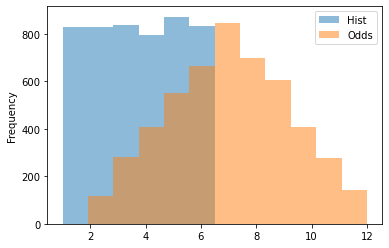

In [83]:
df_dice = pd.DataFrame(
    np.random.randint(1, 7, 5000),
    columns = ['Hist'])
df_dice['Odds'] = df_dice['Hist'] + np.random.randint(1,7,5000)
# Alpha decreases the opacity in the chart
ax = df_dice.plot.hist(bins = 12, alpha = 0.5)



<AxesSubplot:>

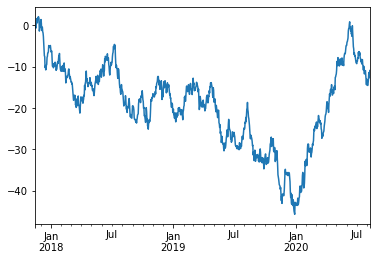

In [84]:
# Basic plot using 1000 random values that create cumulative sums
# over an increasing date range
ser_5 = pd.Series(np.random.randn(1000),
                 index=pd.date_range('11/15/2017', periods=1000))

ser_5 = ser_5.cumsum()
ser_5.plot()

<AxesSubplot:>

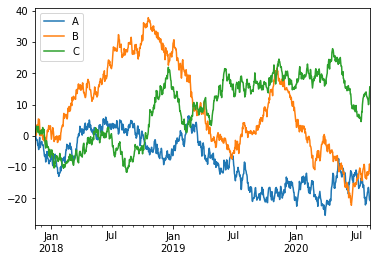

In [85]:
# Display 3 random plots
df_15 = pd.DataFrame(np.random.randn(1000, 3),
                    index=pd.date_range('11/15/2017', periods=1000),
                    columns=list('ABC'))
df_15 = df_15.cumsum()
df_15.plot()

<AxesSubplot:>

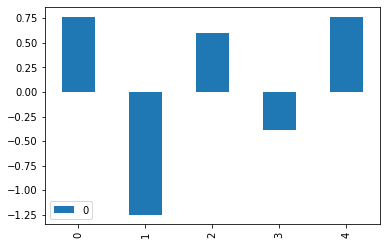

In [86]:
# Make bar chart from 5 random values
pd.DataFrame(np.random.randn(5)).plot.bar()

<AxesSubplot:>

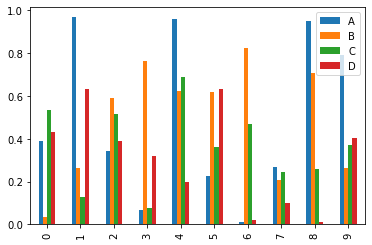

In [90]:
vals = ['A', 'B', 'C', 'D']
df_15 = pd.DataFrame(np.random.rand(10,4), columns=vals)
df_15.plot.bar()

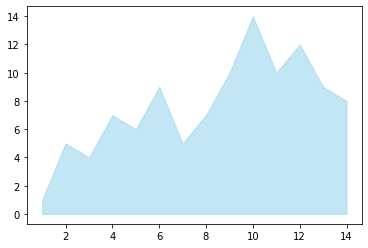

<AxesSubplot:>

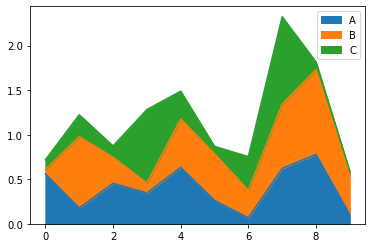

In [96]:
# Area plot 
# Define x range and y values
x_rng = range(1,15)
y_vals = [1,5,4,7,6,9,5,7,10,14,10,12,9,8]
plt.fill_between(x_rng, y_vals, color = 'skyblue', alpha = 0.5)
plt.show()

pd.DataFrame(np.random.rand(10,3), columns = ['A', 'B', 'C']).plot.area()

In [98]:
#pd.DataFrame(np.random.rand(100, 2), columns=['A', 'B']).plt_scatter(x = 'A', y = 'B')

AttributeError: 'DataFrame' object has no attribute 'plt_scatter'

<AxesSubplot:xlabel='C', ylabel='D'>

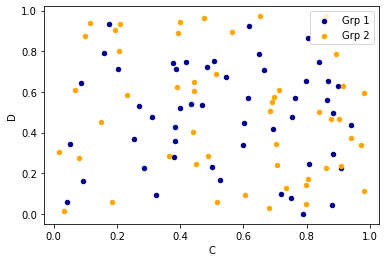

In [101]:
# Multiple column scatter plots
df_15 = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])
ax = df_15.plot.scatter(x='A', y='B', color='DarkBlue', label='Grp 1')
df_15.plot.scatter(x='C', y='D', color='Orange', label='Grp 2', ax=ax)

<AxesSubplot:ylabel='Pie'>

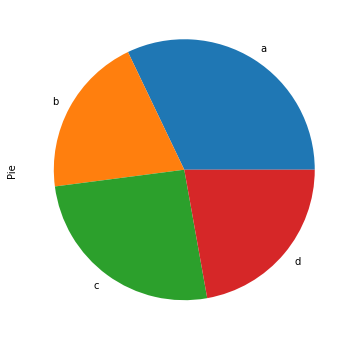

In [104]:
#Pie Charts with 4 random values
pd.Series(np.random.rand(4),
         index=['a','b','c','d'], 
          name='Pie').plot.pie(figsize=(6,6))

In [1]:
import pandas as pd

students = {"name" : ["Tim Voss", "Nicole Johnson", "Elsa Williams", "John James", "Catherine Jones"], "age" : [19, 20, 21, 20, 23], "favorite_color" : ["red", "yellow", "green", "blue", "green"], "grade" : [91, 95, 82, 75, 93]}

students_df = pd.DataFrame(students)

In [3]:
def grades_colors(students_df):
    students_df = students_df[(students_df['favorite_color'].isin(['green', 'red'])) & (students_df['grade'] > 90)] #this is treated as one expression
    return students_df

grades_colors(students_df)

,name,age,favorite_color,grade
0,Tim Voss,19,red,91
4,Catherine Jones,23,green,93


In [15]:
import pandas as pd

cheeses = {"Name": ["Bohemian Goat", "Central Coast Bleu", "Cowgirl Mozzarella", 
"Cypress Grove Cheddar", "Oakdale Colby"], 
"Price" : [15.00, None, 30.00, None, 45.00]}

df_cheeses = pd.DataFrame(cheeses)

Write a function cheese_median to impute the median price of the selected California cheeses in place of the missing values. You may assume at least one cheese is not missing its price.

In [14]:
def cheese_median(df_cheeses):
    m = df_cheeses['Price'].median()
    df_cheeses['Price'] = df_cheeses['Price'].fillna(m)
    return df_cheeses

cheese_median(df_cheeses)
#where there is an NA, fill with the median of the price values
#does there exist a fillna function? yest there does. 


,Name,Price
0,Bohemian Goat,15.0
1,Central Coast Bleu,30.0
2,Cowgirl Mozzarella,30.0
3,Cypress Grove Cheddar,30.0
4,Oakdale Colby,45.0


In [6]:
df_cheeses.Price.fillna(df_cheeses.Price.median())

0    15.0
1    30.0
2    30.0
3    30.0
4    45.0
Name: Price, dtype: float64

In [16]:
def cheese_median(df_cheeses):
  k = [i for i in sorted(df_cheeses.iloc[:,1]) if pd.isnull(i)==False]
  if len(k)%2!=0:
    k=k[len(k)//2]
  else:
    k= (k[len(k)//2-1]+k[len(k)//2])/2
  df_cheeses.iloc[:,1]=df_cheeses.iloc[:,1].apply(lambda x: k if pd.isnull(x) else x)
  return df_cheeses

In [18]:
cheese_median(df_cheeses)

,Name,Price
0,Bohemian Goat,15.0
1,Central Coast Bleu,30.0
2,Cowgirl Mozzarella,30.0
3,Cypress Grove Cheddar,30.0
4,Oakdale Colby,45.0
